In [705]:
# Import the required modules
import pandas as pd
import numpy as np

In [706]:
# Read the respiratory rate file 'suresh-rr'
df_streaks = pd.read_csv('C:\\Users\\sures\\Downloads\\streaks_data.csv')

In [707]:
df_split_start = pd.to_datetime(df_streaks['start_at'], format='%m/%d/%Y %H:%M')
df_split_stop = pd.to_datetime(df_streaks['stop_at'], format='%m/%d/%Y %H:%M')
df_streaks['date_start'] = df_split_start.dt.date
df_streaks['time_start'] = df_split_start.dt.time
df_streaks['date_stop'] = df_split_stop.dt.date
df_streaks['time_stop'] = df_split_stop.dt.time

In [708]:
# Converting 'date' to data type datetime
df_streaks['date_start'] = pd.to_datetime(df_streaks['date_start'], errors='coerce')
df_streaks['date_stop'] = pd.to_datetime(df_streaks['date_stop'], errors='coerce')
# Converting 'time' to data type datetime
df_streaks['time_start'] = pd.to_datetime(df_streaks['time_start'], format='%H:%M:%S' ).apply(pd.Timestamp)
df_streaks['time_stop'] = pd.to_datetime(df_streaks['time_stop'], format='%H:%M:%S' ).apply(pd.Timestamp)

In [709]:
# Creating columns for Year, Month, Day and Hour
df_streaks['Year_start'] = df_streaks['date_start'].dt.year
#df_streaks['Year_stop'] = df_streaks['date_stop'].dt.year
df_streaks['Month_start'] = df_streaks['date_start'].dt.month
#df_streaks['Month_stop'] = df_streaks['date_stop'].dt.month
df_streaks['Day_start'] = df_streaks['date_start'].dt.day
#df_streaks['Day_stop'] = df_streaks['date_stop'].dt.day
df_streaks['time_hour_start'] = df_streaks['time_start'].dt.hour
df_streaks['time_minute_start'] = df_streaks['time_start'].dt.minute
#df_streaks['time_second_start'] = df_streaks['time_start'].dt.second
df_streaks['time_hour_stop'] = df_streaks['time_stop'].dt.hour
df_streaks['time_minute_stop'] = df_streaks['time_stop'].dt.minute
#df_streaks['time_second_stop'] = df_streaks['time_stop'].dt.second

In [710]:
df_streaks['day_of_week'] = df_streaks['date_start'].dt.day_name()

In [711]:
# Creating a column "day_type" based on days

def day_type(c):
    
    if c['day_of_week'] == 'Saturday' or c['day_of_week'] == 'Sunday':
        return 'week_end'
    else:
        return 'work_day'

df_streaks['day_type'] = df_streaks.apply(day_type, axis=1)

In [712]:
df_streaks['day_type'] = df_streaks.apply(day_type, axis=1)

In [713]:
def day_phase_streaks(c):
    
    if 0 <= c['time_hour_start'] <= 7:
        return 'night'
    else:
        return 'day'

df_streaks['day_phase'] = df_streaks.apply(day_phase_streaks, axis=1)

In [714]:
def time_type_streaks(c):
    
    if 9 <= c['time_hour_start'] <= 17 and c['day_type'] =='work_day':
        return 'work'
    elif 17 < c['time_hour_start'] <= 24:
        return 'personal'

df_streaks['time_type'] = df_streaks.apply(time_type_streaks, axis=1)

In [715]:
def season_streaks(c):
    if 3 >= c['Month_start'] <= 5:
        return 'Spring'
    elif 6 >= c['Month_start'] <= 8:
         return 'Summer'
    elif 9 >= c['Month_start'] <= 11:
         return 'Fall'
    else:
        return 'Winter'

df_streaks['Season'] = df_streaks.apply(season_streaks, axis=1)

In [716]:
def day_light_streaks(c):
    if c['Month_start'] == 3 & c['Year_start'] == 2018 & 11 <= c['Day_start'] <= 12:
        return 'DST'
    elif c['Month_start'] == 3 & c['Year_start'] == 2019 & 10 <= c['Day_start'] <= 11:
        return 'DST'
    elif c['Month_start'] == 3 & c['Year_start'] == 2017 & 11 <= c['Day_start'] <= 13:
        return 'DST'
    elif c['Month_start'] == 11 & c['Year_start'] == 2017 & 4 <= c['Day_start'] <= 6:
        return 'DST'
    elif c['Month_start'] == 11 & c['Year_start'] == 2018 & 3 <= c['Day_start'] <= 5:
        return 'DST'
    else:
        return 'No DST'

df_streaks['DST'] = df_streaks.apply(day_light_streaks, axis=1)

In [717]:
df_streaks.head()

,created_at,streak_type,value,start_at,stop_at,date_start,time_start,date_stop,time_stop,Year_start,...,time_hour_start,time_minute_start,time_hour_stop,time_minute_stop,day_of_week,day_type,day_phase,time_type,Season,DST
0,31:37.3,sedentary,2940,7/4/2018 7:15,7/4/2018 8:04,2018-07-04,1900-01-01 07:15:00,2018-07-04,1900-01-01 08:04:00,2018,...,7,15,8,4,Wednesday,work_day,night,None,Fall,No DST
1,32:41.9,calm,120,9/3/2018 20:26,9/3/2018 20:28,2018-09-03,1900-01-01 20:26:00,2018-09-03,1900-01-01 20:28:00,2018,...,20,26,20,28,Monday,work_day,day,personal,Fall,No DST
2,23:28.3,focus,240,7/4/2018 8:20,7/4/2018 8:24,2018-07-04,1900-01-01 08:20:00,2018-07-04,1900-01-01 08:24:00,2018,...,8,20,8,24,Wednesday,work_day,day,None,Fall,No DST
3,27:04.7,focus,120,1/12/2019 5:23,1/12/2019 5:25,2019-01-12,1900-01-01 05:23:00,2019-01-12,1900-01-01 05:25:00,2019,...,5,23,5,25,Saturday,week_end,night,None,Spring,No DST
4,23:26.1,sedentary,1680,7/4/2018 8:11,7/4/2018 8:39,2018-07-04,1900-01-01 08:11:00,2018-07-04,1900-01-01 08:39:00,2018,...,8,11,8,39,Wednesday,work_day,day,None,Fall,No DST


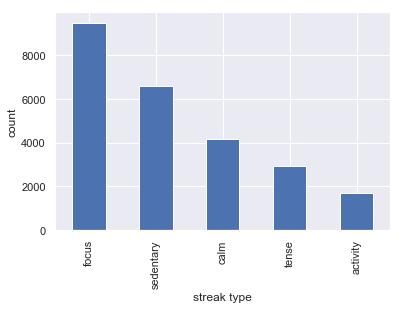

In [718]:
df_streaks['streak_type'].value_counts().plot(kind='bar')
plt.xlabel('streak type')
plt.ylabel('count')
plt.show()

In [719]:
df_streaks['streak_duration_minutes'] = df_streaks.value/60

In [720]:
df_streaks.head()

,created_at,streak_type,value,start_at,stop_at,date_start,time_start,date_stop,time_stop,Year_start,...,time_minute_start,time_hour_stop,time_minute_stop,day_of_week,day_type,day_phase,time_type,Season,DST,streak_duration_minutes
0,31:37.3,sedentary,2940,7/4/2018 7:15,7/4/2018 8:04,2018-07-04,1900-01-01 07:15:00,2018-07-04,1900-01-01 08:04:00,2018,...,15,8,4,Wednesday,work_day,night,None,Fall,No DST,49.0
1,32:41.9,calm,120,9/3/2018 20:26,9/3/2018 20:28,2018-09-03,1900-01-01 20:26:00,2018-09-03,1900-01-01 20:28:00,2018,...,26,20,28,Monday,work_day,day,personal,Fall,No DST,2.0
2,23:28.3,focus,240,7/4/2018 8:20,7/4/2018 8:24,2018-07-04,1900-01-01 08:20:00,2018-07-04,1900-01-01 08:24:00,2018,...,20,8,24,Wednesday,work_day,day,None,Fall,No DST,4.0
3,27:04.7,focus,120,1/12/2019 5:23,1/12/2019 5:25,2019-01-12,1900-01-01 05:23:00,2019-01-12,1900-01-01 05:25:00,2019,...,23,5,25,Saturday,week_end,night,None,Spring,No DST,2.0
4,23:26.1,sedentary,1680,7/4/2018 8:11,7/4/2018 8:39,2018-07-04,1900-01-01 08:11:00,2018-07-04,1900-01-01 08:39:00,2018,...,11,8,39,Wednesday,work_day,day,None,Fall,No DST,28.0


In [721]:
df_streaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24885 entries, 0 to 24884
Data columns (total 23 columns):
created_at                 24885 non-null object
streak_type                24885 non-null object
value                      24885 non-null int64
start_at                   24885 non-null object
stop_at                    24885 non-null object
date_start                 24885 non-null datetime64[ns]
time_start                 24885 non-null datetime64[ns]
date_stop                  24885 non-null datetime64[ns]
time_stop                  24885 non-null datetime64[ns]
Year_start                 24885 non-null int64
Month_start                24885 non-null int64
Day_start                  24885 non-null int64
time_hour_start            24885 non-null int64
time_minute_start          24885 non-null int64
time_hour_stop             24885 non-null int64
time_minute_stop           24885 non-null int64
day_of_week                24885 non-null object
day_type                   24885 n

In [722]:
# Grouping by streaks and calculating the total duration of each streak type
group_streak_type_sum = df_streaks.groupby(['streak_type'])['streak_duration_minutes'].sum().reset_index().sort_values('streak_duration_minutes')
group_streak_type_sum

,streak_type,streak_duration_minutes
4,tense,10380.000000
0,activity,23403.616667
1,calm,23896.000000
2,focus,37091.000000
3,sedentary,162820.000000


In [723]:
# Grouping by streaks and calculating the total number of each streak type
group_streak_type_count = df_streaks.groupby(['streak_type'])['streak_duration_minutes'].count().reset_index().sort_values('streak_duration_minutes')
group_streak_type_count

,streak_type,streak_duration_minutes
0,activity,1696
4,tense,2914
1,calm,4170
3,sedentary,6607
2,focus,9498


In [724]:
# Grouping the streaks and calculating the mean duration of each streak
group_streak_type_mean_duration = df_streaks.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index().sort_values('streak_duration_minutes')

In [725]:
group_streak_type_mean_duration

,streak_type,streak_duration_minutes
4,tense,3.562114
2,focus,3.905138
1,calm,5.730456
0,activity,13.799302
3,sedentary,24.643560


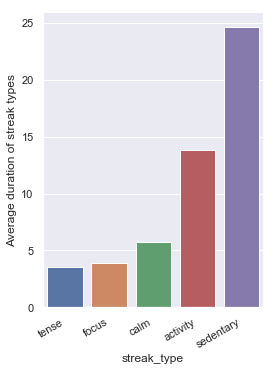

In [726]:
# Plotting the average duration of each streak type
import seaborn as sns
g = sns.catplot(x="streak_type", y ='streak_duration_minutes',
                   data=group_streak_type_mean_duration,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Average duration of streak types')
#plt.tight_layout()
plt.show()

In [727]:
# Calculate the sum of the streaks date wise 
group_streak_type_date_wise_duration_sum = df_streaks.groupby(['date_start', 'streak_type'])['streak_duration_minutes'].sum().reset_index()
#group_streak_type_date_wise_duration_sum

In [728]:
# Count of the number of streaks date wise
group_streak_type_date_wise_count = df_streaks.groupby(['date_start', 'streak_type'])['streak_duration_minutes'].count().reset_index()
#group_streak_type_date_wise_count

In [729]:
# Calculate the average number of streaks of each type per day
group_streak_type_daily_mean_count = group_streak_type_date_wise_count.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index().sort_values('streak_duration_minutes')
group_streak_type_daily_mean_count

,streak_type,streak_duration_minutes
0,activity,5.542484
4,tense,9.250794
1,calm,13.365385
3,sedentary,20.455108
2,focus,29.588785


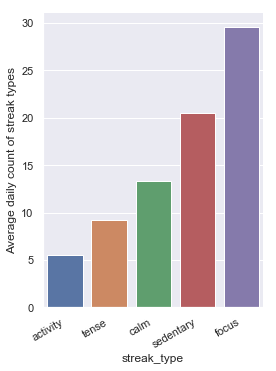

In [730]:
# Plotting the average number of streaks of each type per day
g = sns.catplot(x="streak_type", y ='streak_duration_minutes',
                   data=group_streak_type_daily_mean_count,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Average daily count of streak types')
#plt.tight_layout()
plt.show()

In [731]:
# Grouping to calculate the daily duration of streaks per day
group_streak_type_daily_average_duration = group_streak_type_date_wise_duration_sum.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index().sort_values('streak_duration_minutes')
group_streak_type_daily_average_duration

,streak_type,streak_duration_minutes
4,tense,32.952381
0,activity,76.482407
1,calm,76.589744
2,focus,115.548287
3,sedentary,504.086687


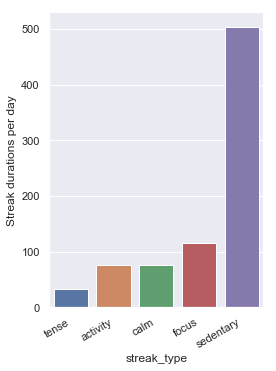

In [732]:
# Plotting total streak duration per day per type
g = sns.catplot(x="streak_type", y ='streak_duration_minutes',
                   data=group_streak_type_daily_average_duration,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.ylabel('Streak durations per day')
plt.show()

In [733]:
# Grouping to find the sum of duration by streak type
#group_date_type = df_streaks.groupby(['date_start', 'streak_type'])['streak_duration_minutes'].sum().reset_index()

In [734]:
# Grouping again and calculate the mean duration of streak type per day
#group_date_type_avg = group_date_type.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index().sort_values('streak_duration_minutes')

In [735]:
#group_date_type_avg

In [736]:
# Grouping and calculating streak durations on work days
df_work_day = df_streaks.loc[df_streaks['day_type'] == 'work_day']
group_streak_type_date_wise_duration_sum_work_day = df_work_day.groupby(['date_start', 'streak_type'])['streak_duration_minutes'].sum().reset_index()
group_streak_type_daily_average_duration_work_day = group_streak_type_date_wise_duration_sum_work_day.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index().sort_values('streak_duration_minutes')
group_streak_type_daily_average_duration_work_day

,streak_type,streak_duration_minutes
4,tense,30.854626
1,calm,66.661435
0,activity,76.637519
2,focus,111.854978
3,sedentary,491.383621


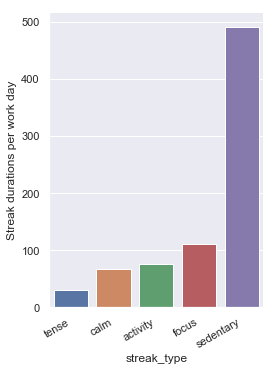

In [737]:
# Plotting total streak durations per work day per type
g = sns.catplot(x="streak_type", y ='streak_duration_minutes',
                   data=group_streak_type_daily_average_duration_work_day,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.ylabel('Streak durations per work day')
plt.show()

In [738]:
# Grouping and calculating streak durations on week ends
df_week_end = df_streaks.loc[df_streaks['day_type'] == 'week_end']
group_streak_type_date_wise_duration_sum_week_end = df_week_end.groupby(['date_start', 'streak_type'])['streak_duration_minutes'].sum().reset_index()
group_streak_type_daily_average_duration_week_end = group_streak_type_date_wise_duration_sum_week_end.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index().sort_values('streak_duration_minutes')
group_streak_type_daily_average_duration_week_end

,streak_type,streak_duration_minutes
4,tense,38.363636
0,activity,76.091954
1,calm,101.466292
2,focus,125.027778
3,sedentary,536.472527


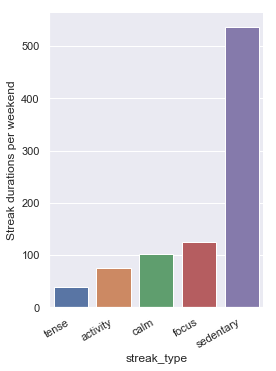

In [739]:
# Plotting total streak durations per weekend per type
g = sns.catplot(x="streak_type", y ='streak_duration_minutes',
                   data=group_streak_type_daily_average_duration_week_end,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.ylabel('Streak durations per weekend')
plt.show()

In [740]:
group_by_dates = df_streaks.groupby(['date_start','streak_type'])['streak_duration_minutes'].sum().reset_index()
group_by_streak_type = group_by_dates.groupby(['streak_type'])['streak_duration_minutes'].mean().reset_index()
#group_by_days

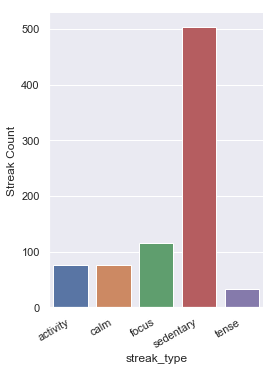

In [741]:
g = sns.catplot(x="streak_type", y ='streak_duration_minutes',
                   data=group_by_streak_type,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Streak Count')
#plt.tight_layout()
plt.show()

In [742]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'day_type'])['streak_duration_minutes'].sum().reset_index()
group_by_day_type = group_by_dates.groupby(['day_type', 'streak_type'])['streak_duration_minutes'].mean().reset_index()
#group_by_days

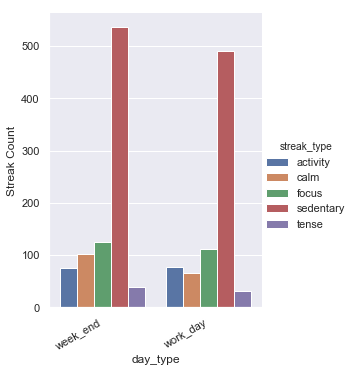

In [743]:
g = sns.catplot(x="day_type", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_day_type,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Streak Count')
#plt.tight_layout()
plt.show()

In [744]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'Year_start'])['streak_duration_minutes'].sum().reset_index()
group_by_years = group_by_dates.groupby(['Year_start', 'streak_type'])['streak_duration_minutes'].mean().reset_index()
#group_by_days

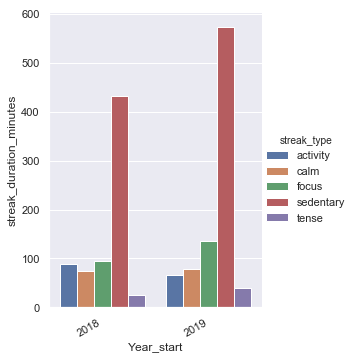

In [745]:
g = sns.catplot(x="Year_start", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_years,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.show()

In [746]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'Year_start'])['streak_duration_minutes'].sum().reset_index()
group_by_years_count = group_by_dates.groupby(['Year_start', 'streak_type'])['streak_duration_minutes'].count().reset_index()
#group_by_days

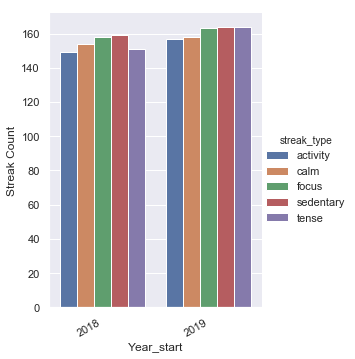

In [747]:
g = sns.catplot(x="Year_start", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_years_count,
                   kind="bar", height=5, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Streak Count')
#plt.tight_layout()
plt.show()

In [748]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'Month_start'])['streak_duration_minutes'].sum().reset_index()
group_by_months = group_by_dates.groupby(['Month_start', 'streak_type'])['streak_duration_minutes'].mean().reset_index()
#group_by_days

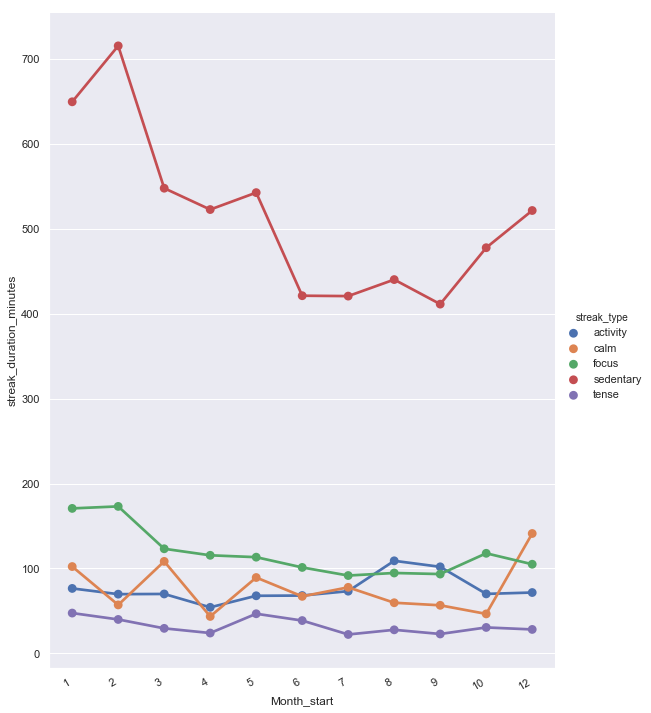

In [749]:
g = sns.catplot(x="Month_start", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_months,
                   kind="point", height=10, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.show()

In [750]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'Day_start'])['streak_duration_minutes'].sum().reset_index()
group_by_dates = group_by_dates.groupby(['Day_start', 'streak_type'])['streak_duration_minutes'].mean().reset_index()
#group_by_days

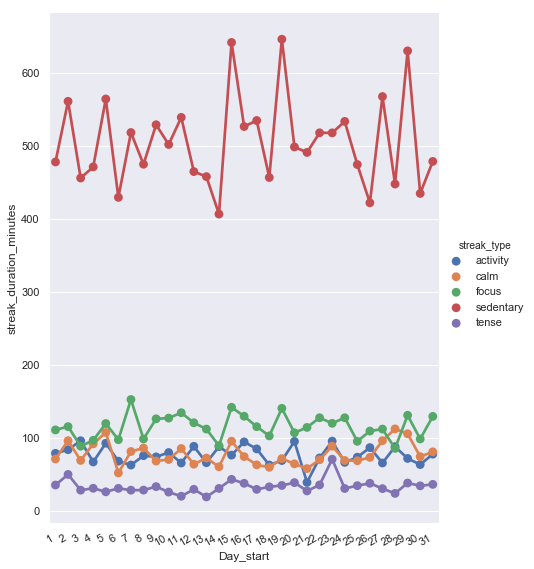

In [753]:
g = sns.catplot(x="Day_start", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_dates,
                   kind="point", height=8, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.show()

In [754]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'day_of_week'])['streak_duration_minutes'].sum().reset_index()
group_by_days = group_by_dates.groupby(['day_of_week', 'streak_type'])['streak_duration_minutes'].mean().reset_index()
#group_by_days

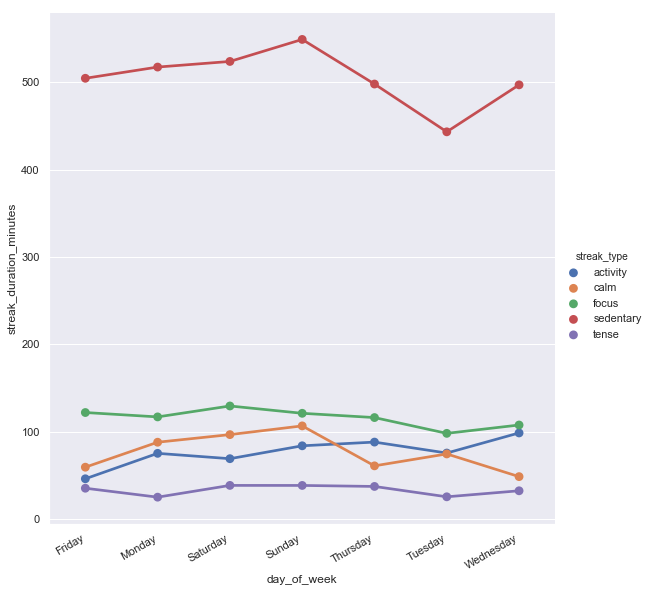

In [755]:
g = sns.catplot(x="day_of_week", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_days,
                   kind="point", height=8, aspect=1)
g.set_xticklabels(rotation=30, ha="right")
#plt.tight_layout()
plt.show()

In [ ]:
#group_day_of_week_sum = df_streaks.groupby(['day_of_week','streak_type'])['streak_duration_minutes'].sum().reset_index()
#group_day_of_week_count = df_streaks.groupby(['day_of_week']).count()
#group_day_of_week_count = df_streaks.groupby(['date_start','day_of_week'])['streak_duration_minutes'].count().reset_index()
#group_day_of_week_count = df_streaks.groupby(['date_start'])['day_of_week'].count().reset_index()
#group_day_of_week_count = df_streaks.groupby(['day_of_week','streak_type']).size().reset_index()

#group_day_of_week_count
#group_day_of_week_count = group_day_of_week.groupby(['day_of_week']).count().reset_index()
#group_day_of_week = df_streaks.groupby(['date_start', 'day_of_week']).count()
#group_day_of_week_sum
#group_day_of_week_count
#group_day_of_week_count =group_day_of_week_count.rename(columns = {'streak_duration_minutes':'count_streaks'})
#group_day_of_week_count_rename
#group_day_of_week_count.columns = ['count' if x=='streak_duration_minutes' else x for x in group_day_of_week_count.columns]
#group_day_of_week_count.rename(columns={'streak_duration_minutes':'count_streak_duration'}, inplace=True)
#day_of_week_merged = pd.concat([group_day_of_week_sum, group_day_of_week_count], axis =1)
#day_of_week_merged
#day_of_week_merged['streaks_duration_per_day'] = day_of_week_merged.streak_duration_minutes / day_of_week_merged.count_streaks
#day_of_week_merged

In [ ]:
#df_streaks.to_csv("output_streaks.csv", index=False)

In [ ]:
#group_day_of_week_count = df_streaks.groupby(['day_of_week', 'streak_type'])['streak_duration_minutes'].count().reset_index()

In [ ]:
#group_day_of_week_duration = df_streaks.groupby(['day_of_week', 'streak_type'])['streak_duration_minutes'].mean().reset_index()

In [756]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'time_hour_start'])['streak_duration_minutes'].sum().reset_index()
group_by_time_hour = group_by_dates.groupby(['time_hour_start', 'streak_type'])['streak_duration_minutes'].mean().reset_index()

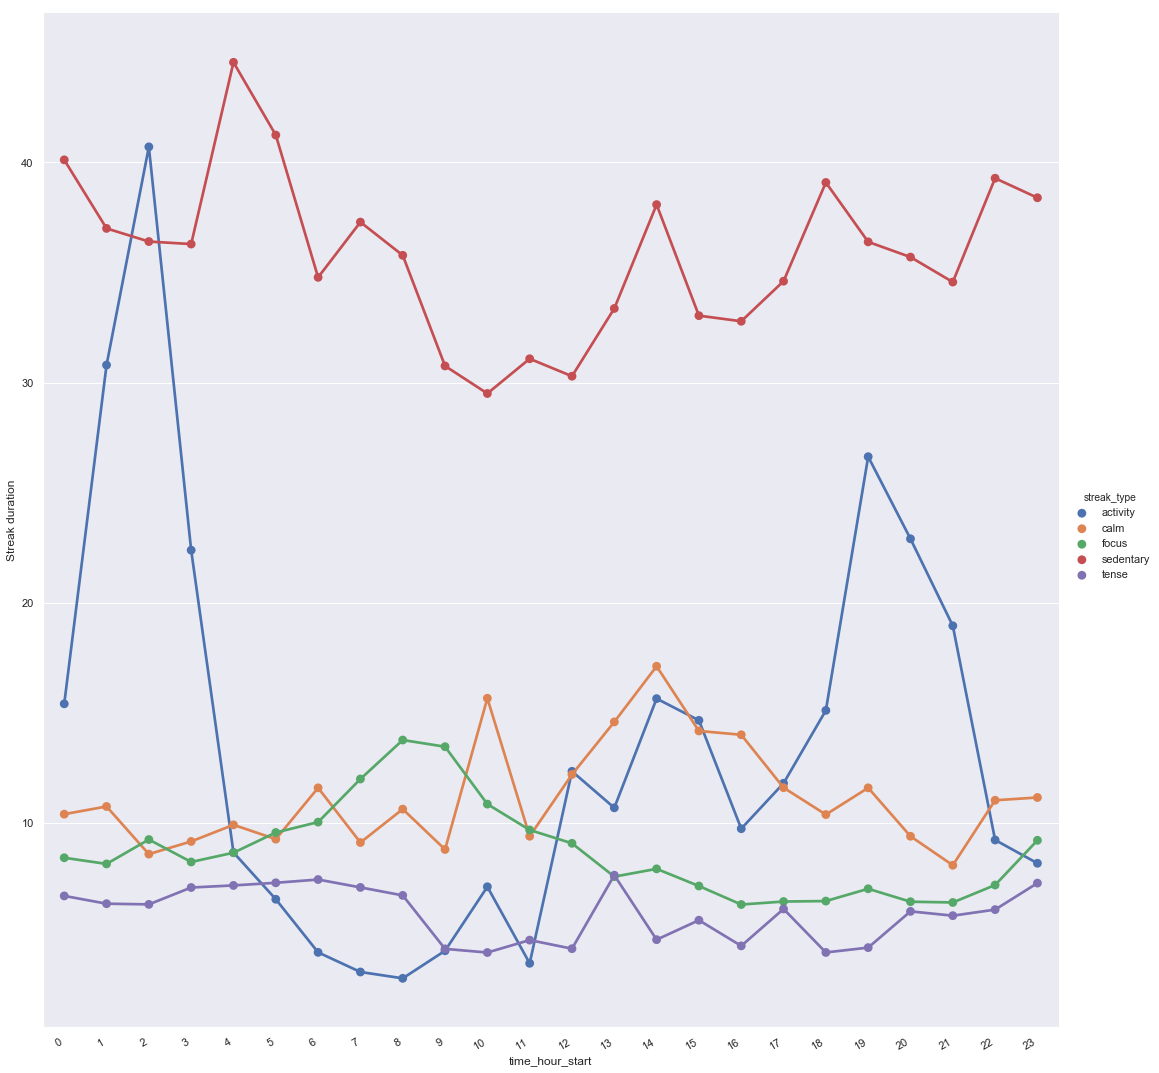

In [760]:
g = sns.catplot(x="time_hour_start", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_time_hour,
                   kind="point", height=15, aspect=1)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Streak duration')
#plt.tight_layout()
plt.show()

In [ ]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'time_type'])['streak_duration_minutes'].sum().reset_index()
group_by_time_type = group_by_dates.groupby(['time_type', 'streak_type'])['streak_duration_minutes'].mean().reset_index()

In [ ]:
g = sns.catplot(x="time_type", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_time_type,
                   kind="bar", height=5, aspect=1)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Streak duration minutes')
#plt.tight_layout()
plt.show()

In [761]:
group_by_dates = df_streaks.groupby(['date_start','streak_type', 'DST'])['streak_duration_minutes'].sum().reset_index()
group_by_DST = group_by_dates.groupby(['DST', 'streak_type'])['streak_duration_minutes'].mean().reset_index()

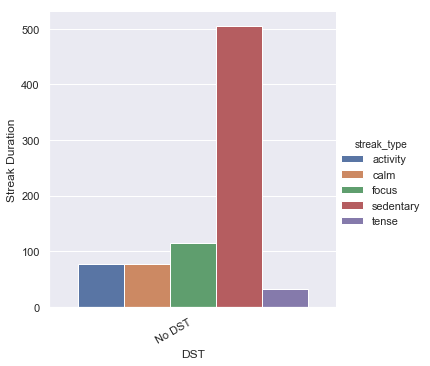

In [762]:
g = sns.catplot(x="DST", y ='streak_duration_minutes', hue='streak_type',
                   data=group_by_DST,
                   kind="bar", height=5, aspect=1)
g.set_xticklabels(rotation=30, ha="right")
plt.ylabel('Streak Duration')
#plt.tight_layout()
plt.show()

In [ ]:
#x_day_light = df_streaks.loc[df_streaks['DST'] == 'DST', 'value']
#y_day_light = df_streaks.loc[df_streaks['DST'] == 'No DST', 'value']
#len(x_day_light)

In [763]:
df1 = (df_streaks[df_streaks['streak_type'] == 'activity']).iloc[:,1:6]
df2 = df_streaks[df_streaks['streak_type'] == 'calm'].iloc[:,1:6]
#df1.iloc[:,1:6]
df_col_merged =pd.concat([df1, df2], axis=0)
df_col_merged
group_streak   = df_col_merged.groupby(['date_start', 'streak_type'])['value'].mean().reset_index()
#group_streak 
group_streak['Ratio'] = group_streak.value / group_streak.value.shift(-1)  
group_streak_trim = group_streak[group_streak['streak_type'] == 'activity']
#group_streak_trim

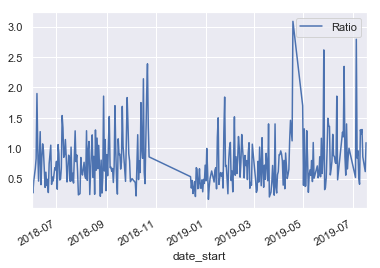

In [764]:
df1 = (df_streaks[df_streaks['streak_type'] == 'tense']).iloc[:,1:6]
df2 = df_streaks[df_streaks['streak_type'] == 'calm'].iloc[:,1:6]
#df1.iloc[:,1:6]
df_col_merged =pd.concat([df1, df2], axis=0)
df_col_merged
group_streak   = df_col_merged.groupby(['date_start', 'streak_type'])['value'].mean().reset_index()
#group_streak 
group_streak['Ratio'] = group_streak.value / group_streak.value.shift(-1)  
group_streak_trim = group_streak[group_streak['streak_type'] == 'tense']
group_streak_trim
group_streak_trim.plot(x='date_start', y='Ratio')  

Text(0, 0.5, 'tense duration')

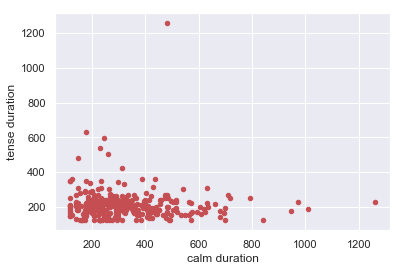

In [766]:
df1 = (df_streaks[df_streaks['streak_type'] == 'tense']).iloc[:,1:6]
df2 = df_streaks[df_streaks['streak_type'] == 'calm'].iloc[:,1:6]
#df1.iloc[:,1:6]
df_col_merged =pd.concat([df1, df2], axis=0)
df_col_merged
group_streak   = df_col_merged.groupby(['date_start', 'streak_type'])['value'].mean().reset_index()
#group_streak 
group_streak['shift_tense'] = group_streak.value.shift(-1)  
group_streak_trim = group_streak[group_streak['streak_type'] == 'calm']
group_streak_trim
group_streak_trim.plot(kind='scatter', x='value', y='shift_tense', color='r')
plt.xlabel('calm duration')
plt.ylabel('tense duration')
#group_streak_trim.plot(x='date_start', y='Ratio')  

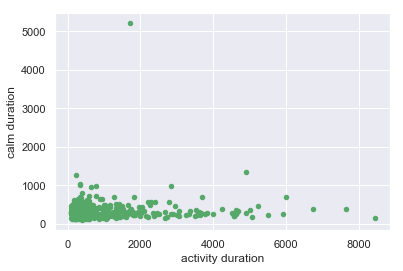

In [765]:
df1 = (df_streaks[df_streaks['streak_type'] == 'activity']).iloc[:,1:6]
df2 = df_streaks[df_streaks['streak_type'] == 'calm'].iloc[:,1:6]
#df1.iloc[:,1:6]
df_col_merged =pd.concat([df1, df2], axis=0)
df_col_merged
group_streak   = df_col_merged.groupby(['date_start', 'streak_type'])['value'].mean().reset_index()
#group_streak 
group_streak['shift_tense'] = group_streak.value.shift(-1)  
#group_streak 
group_streak_trim = group_streak[group_streak['streak_type'] == 'activity']
#group_streak_trim
group_streak_trim.plot(kind='scatter', x='value', y='shift_tense', color='g')  
plt.xlabel('activity duration')
plt.ylabel('calm duration')
plt.show()

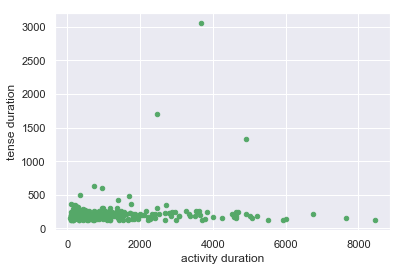

In [774]:
df1 = (df_streaks[df_streaks['streak_type'] == 'activity']).iloc[:,1:6]
df2 = df_streaks[df_streaks['streak_type'] == 'tense'].iloc[:,1:6]
#df1.iloc[:,1:6]
df_col_merged =pd.concat([df1, df2], axis=0)
df_col_merged
group_streak   = df_col_merged.groupby(['date_start', 'streak_type'])['value'].mean().reset_index()
#group_streak 
group_streak['shift_tense'] = group_streak.value.shift(-1)  
#group_streak 
group_streak_trim = group_streak[group_streak['streak_type'] == 'activity']
#group_streak_trim
group_streak_trim.plot(kind='scatter', x='value', y='shift_tense', color='g')  
plt.xlabel('activity duration')
plt.ylabel('tense duration')
plt.show()

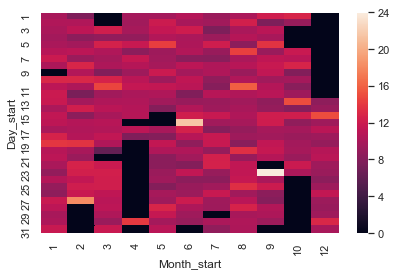

In [771]:
piv = pd.pivot_table(df_streaks, values="streak_duration_minutes",index=["Day_start"], columns=["Month_start"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

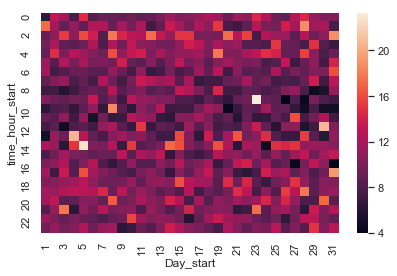

In [773]:
piv = pd.pivot_table(df_streaks, values="streak_duration_minutes",index=["time_hour_start"], columns=["Day_start"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()